In [2]:
from funkyml.classification import Models
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Libraries for Machine Learning and Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import Model, layers, optimizers
from tensorflow.keras.utils import to_categorical



2024-06-27 23:50:23.184748: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 23:50:23.185983: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 23:50:23.230864: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 23:50:23.702980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 23:50:26.307374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

About this file

This CSV file contains a dataset of 240 stars of 6 classes:

    Brown Dwarf -> Star Type = 0

    Red Dwarf -> Star Type = 1

    White Dwarf-> Star Type = 2

    Main Sequence -> Star Type = 3

    Supergiant -> Star Type = 4

    Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.
Lo = 3.828 x 10^26 Watts
Ro = 6.9551 x 10^8 m

In [3]:
df = pd.read_csv('6 class csv.csv')
#df = pd.read_csv ('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [4]:
print("La base de datos tiene", df.shape[0],
      "observaciones y", df.shape[1], "columnas")
print("Las variables de la base de datos son ", df.columns)

La base de datos tiene 240 observaciones y 7 columnas
Las variables de la base de datos son  Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [5]:
df[['Spectral Class']].value_counts()


Spectral Class
M                 111
B                  46
O                  40
A                  19
F                  17
K                   6
G                   1
Name: count, dtype: int64

In [6]:
df[['Star type']].value_counts()


Star type
0            40
1            40
2            40
3            40
4            40
5            40
Name: count, dtype: int64

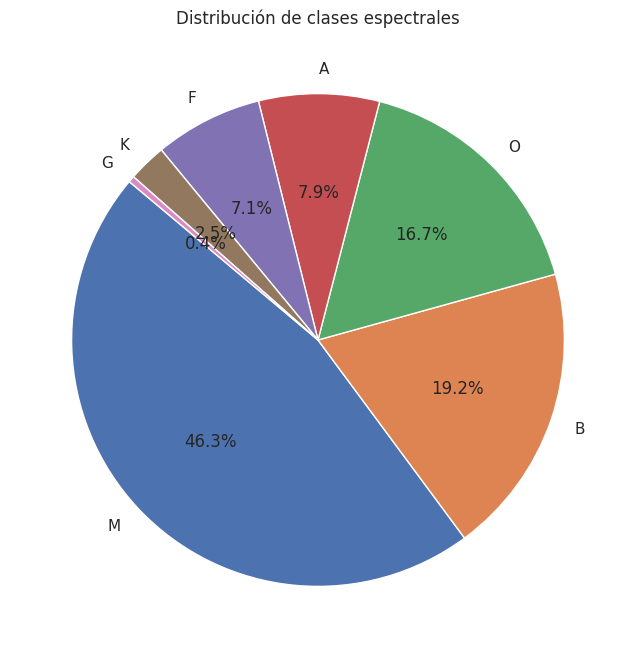

In [7]:
# Aplicar un estilo de Seaborn
sns.set_theme(style="whitegrid")

conteos_star_type = df['Spectral Class'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(conteos_star_type, labels=conteos_star_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de clases espectrales')
plt.show()

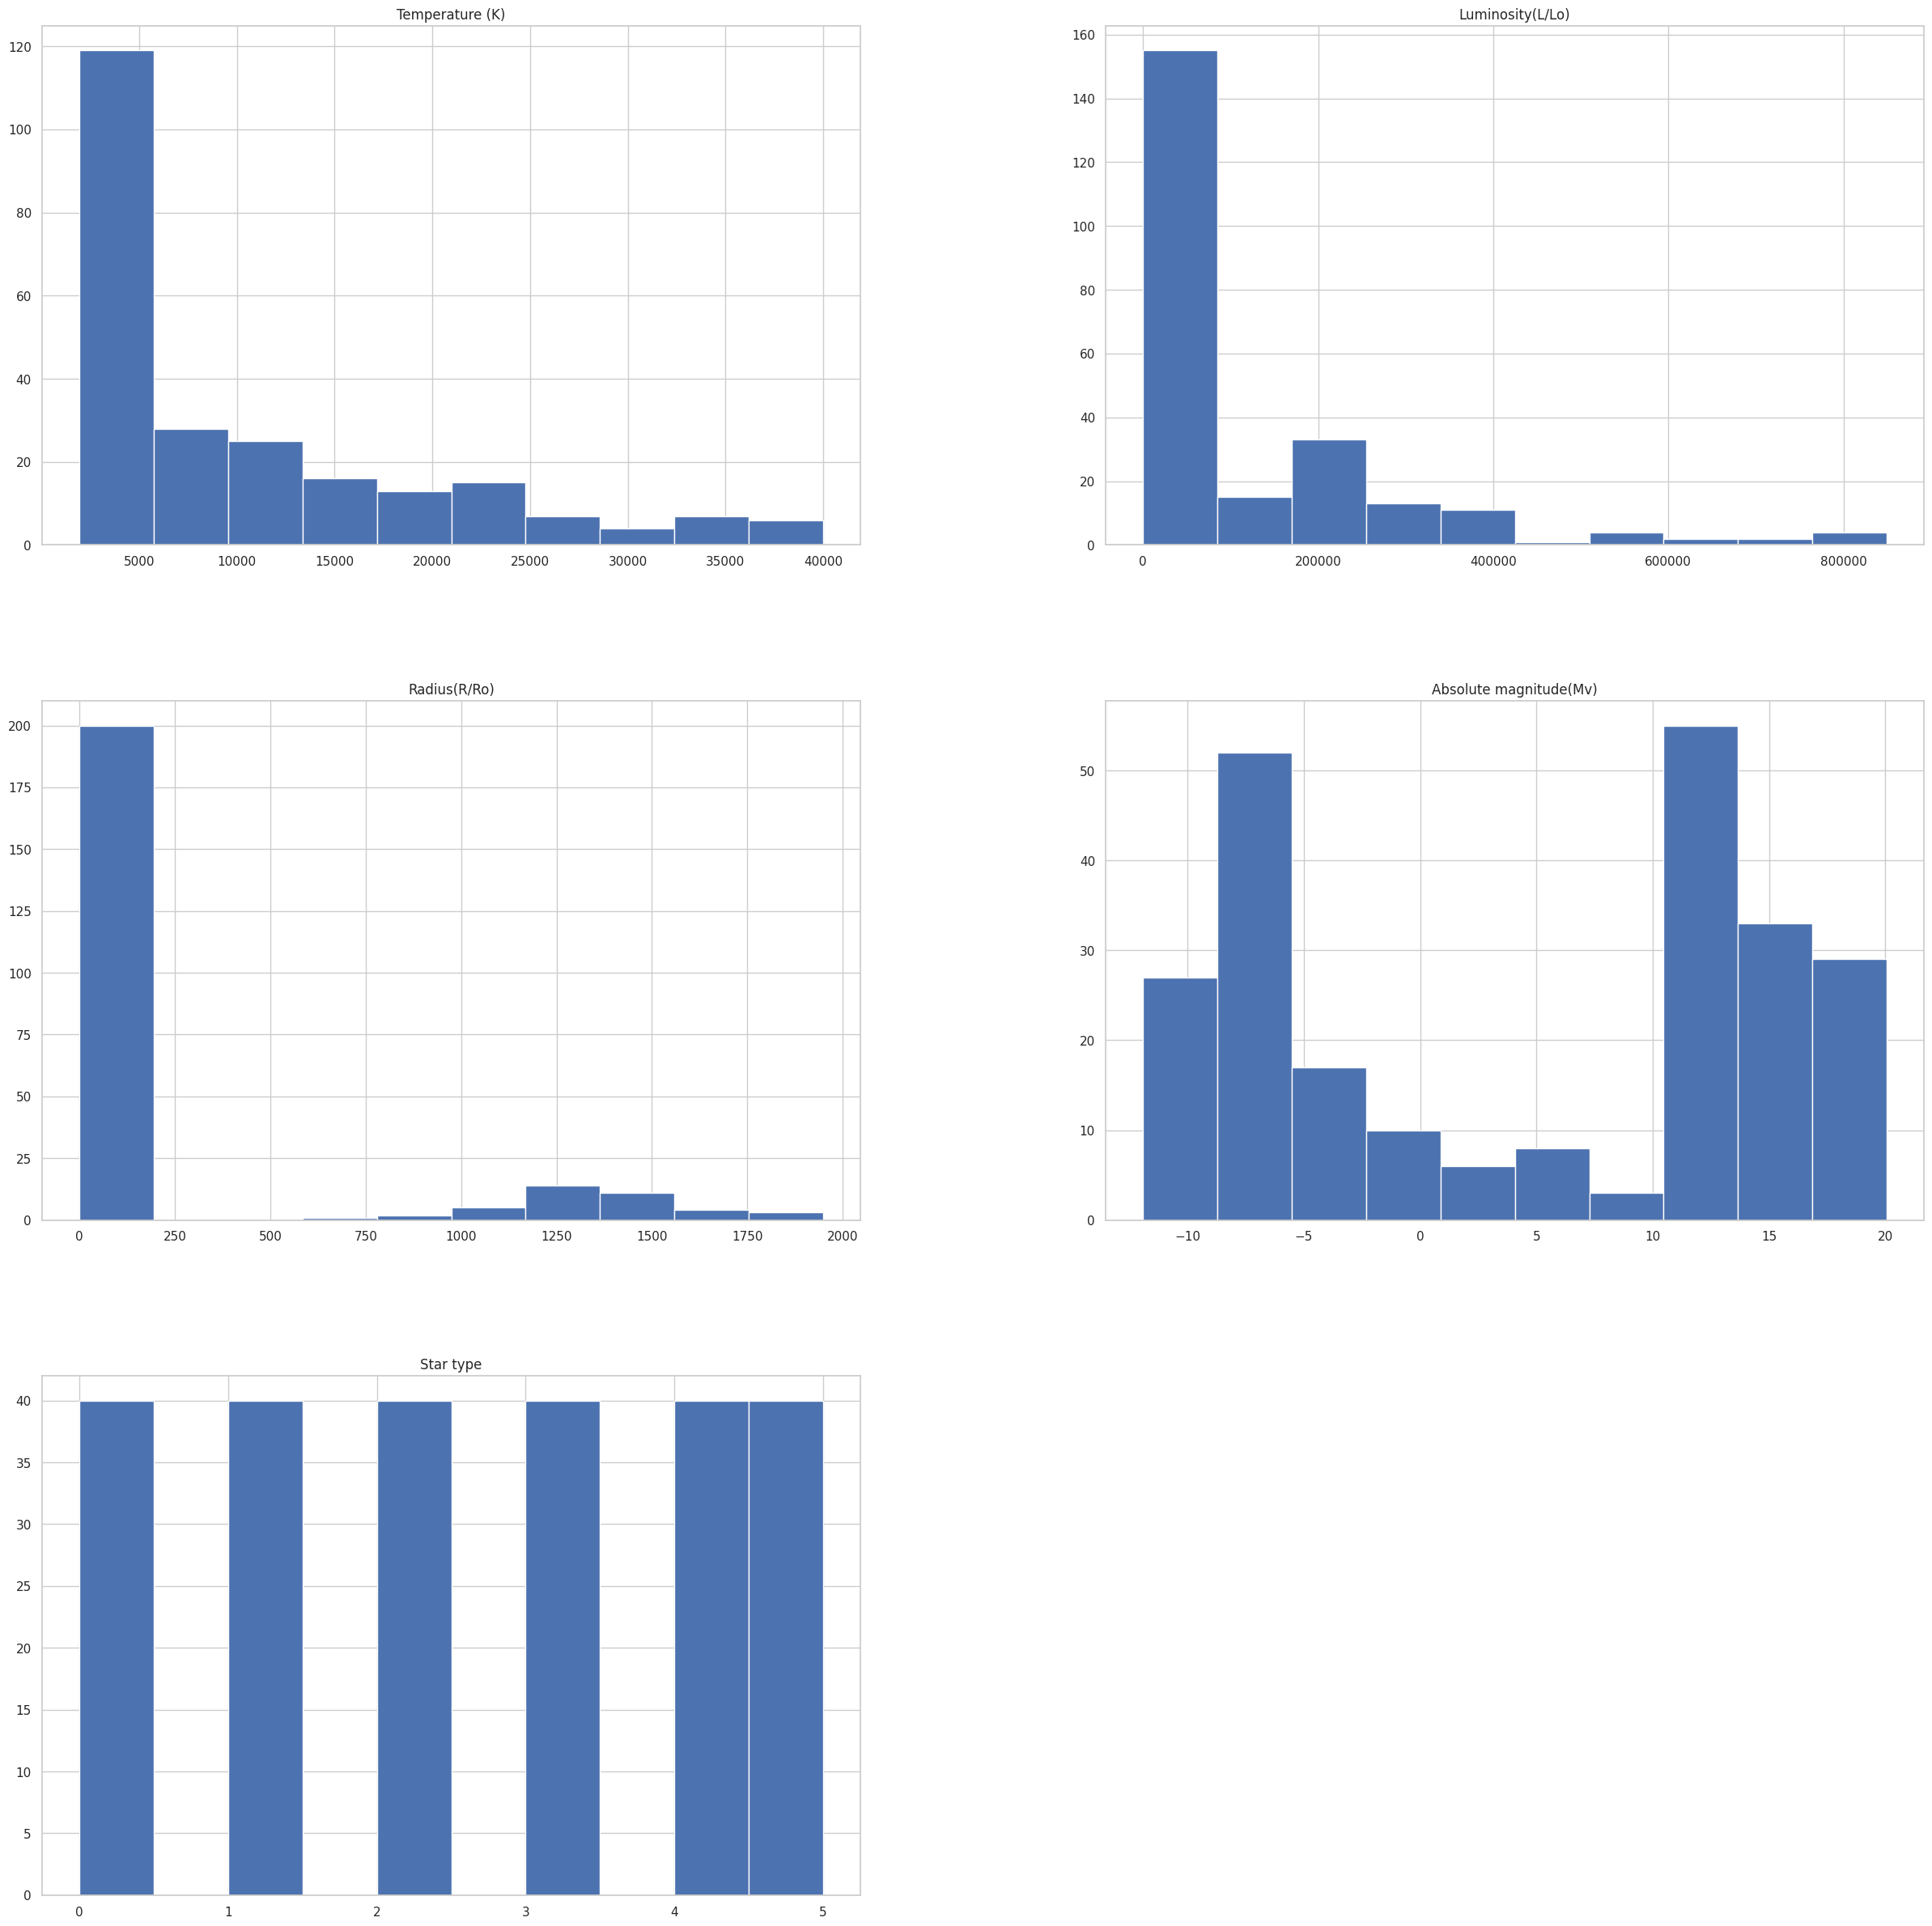

In [8]:
plot_hist = df.hist(figsize=(30, 30))


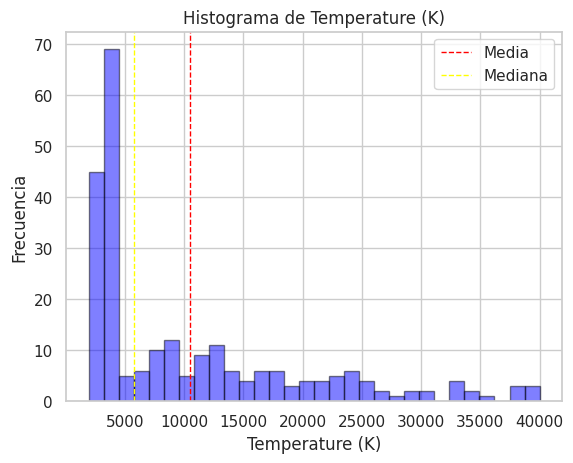

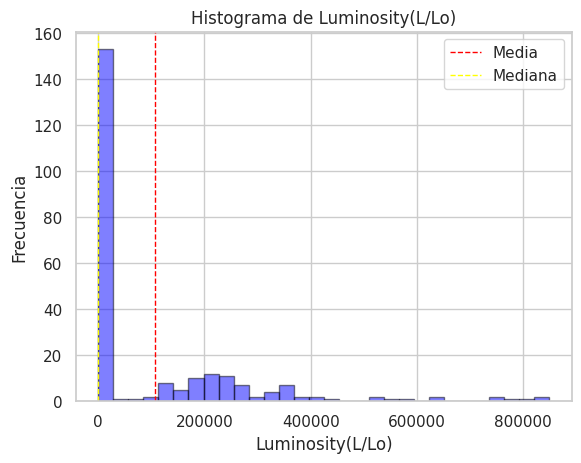

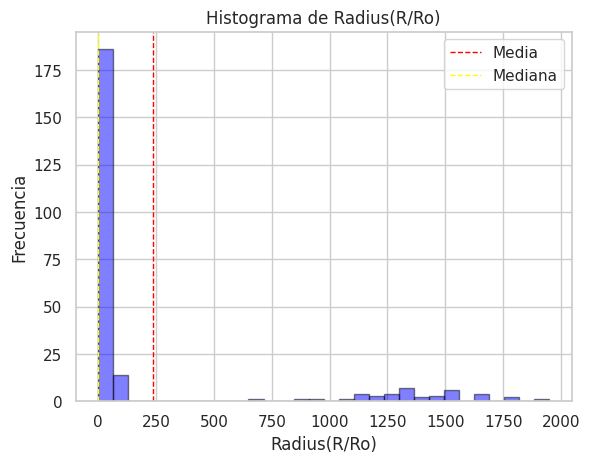

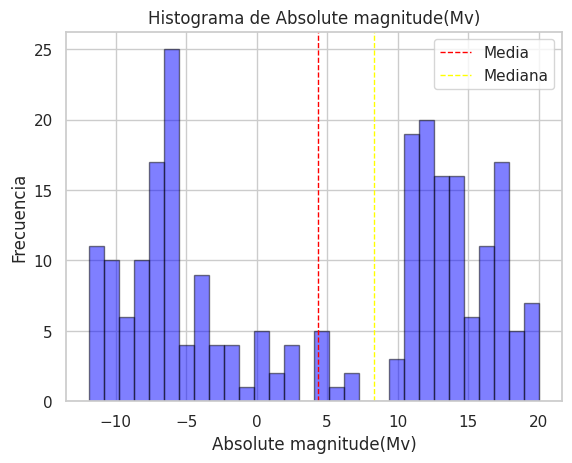

In [9]:

def plot_hist(df, column_name):
    # Calcula la media y la mediana
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    
    # Crea el histograma
    plt.hist(df[column_name], bins=30, alpha=0.5, color='blue', edgecolor='black')
    
    # Dibuja líneas para la media y la mediana
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(median_value, color='yellow', linestyle='dashed', linewidth=1)
    
    # Agrega leyenda, título y etiquetas
    plt.legend({'Media':mean_value, 'Mediana':median_value})
    plt.title(f'Histograma de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    
    

    # Muestra el gráfico
    plt.show()

# Suponiendo que tienes un DataFrame llamado df
# Puedes llamar a la función para cada columna así:
plot_hist(df, 'Temperature (K)')
plot_hist(df, 'Luminosity(L/Lo)')
plot_hist(df, 'Radius(R/Ro)')
plot_hist(df, 'Absolute magnitude(Mv)')


#'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
# 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'

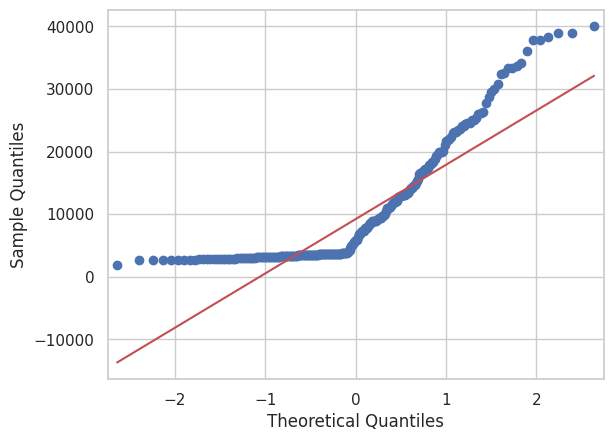

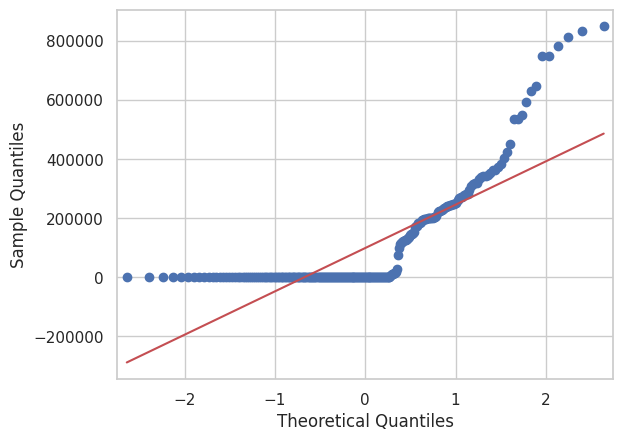

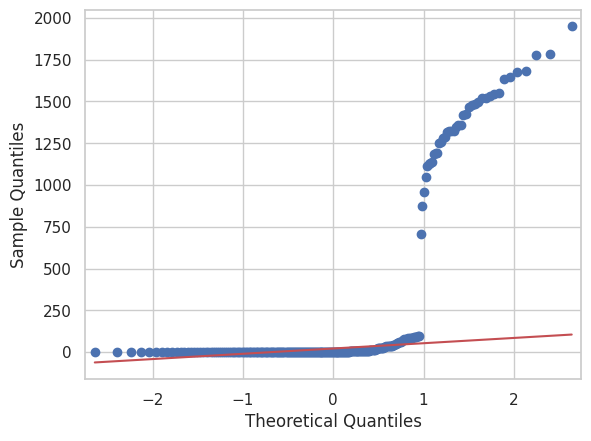

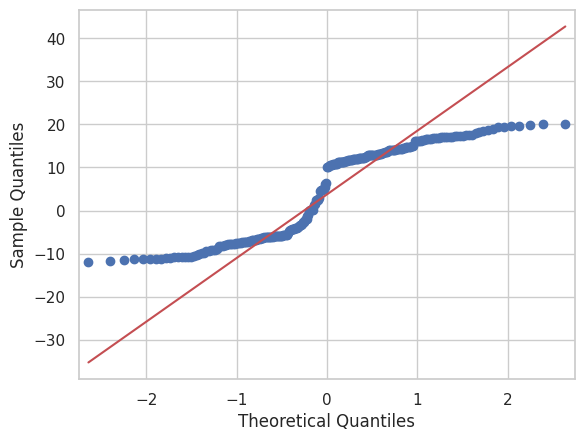

In [10]:
sm.qqplot(df['Temperature (K)'],line='q');
sm.qqplot(df['Luminosity(L/Lo)'],line='q');
sm.qqplot(df['Radius(R/Ro)'],line='q');
sm.qqplot(df['Absolute magnitude(Mv)'],line='q');

#'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
# 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'

El gráfico Q-Q compara la distribución empírica de nuestra variable en el eje Y (con la etiqueta 'Sample Quantities') contra la distribución esperada de la variable (bajo la etiqueta 'Theoretical Quantities').

La opción `line='q'` permite trazar una línea entre cantidades observadas y esperadas en los cuantiles de nuestra variable. Una distribución normal tendrá la mayoría de sus datos cercanos a la línea.

In [11]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [12]:
#creacion de la matriz de atributos
attr_mat = df.drop(['Star type'], axis =1)    #el vector objetivo es star type, pues es lo q queremos predecir

attr_mat.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


In [13]:
df.describe().T.style.bar(subset=['mean'],color='#606ff2').background_gradient(subset=['std'], cmap='turbo').background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.000000,10497.462500,9552.425037,1939.000000,3344.250000,5776.000000,15055.500000,40000.000000
Luminosity(L/Lo),240.000000,107188.361635,179432.244940,0.000080,0.000865,0.070500,198050.000000,849420.000000
Radius(R/Ro),240.000000,237.157781,517.155763,0.008400,0.102750,0.762500,42.750000,1948.500000
Absolute magnitude(Mv),240.000000,4.382396,10.532512,-11.920000,-6.232500,8.313000,13.697500,20.060000
Star type,240.000000,2.500000,1.711394,0.000000,1.000000,2.500000,4.000000,5.000000


<Axes: >

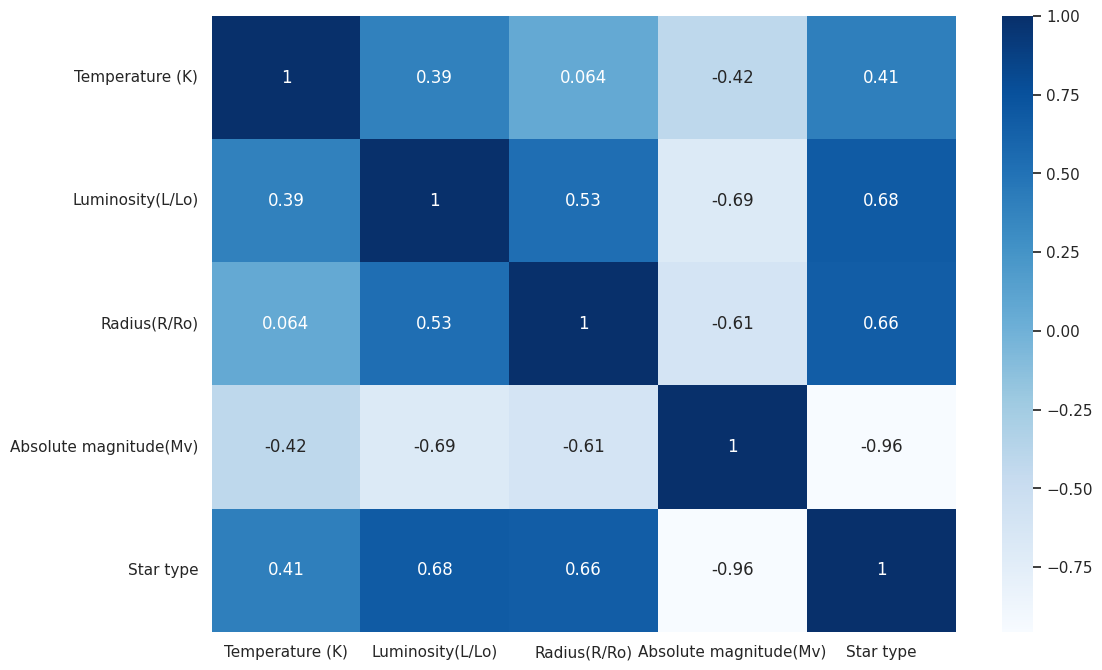

In [14]:
ds = df.drop(['Star color', 'Spectral Class'], axis = 1)
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot = True, cmap = 'Blues')


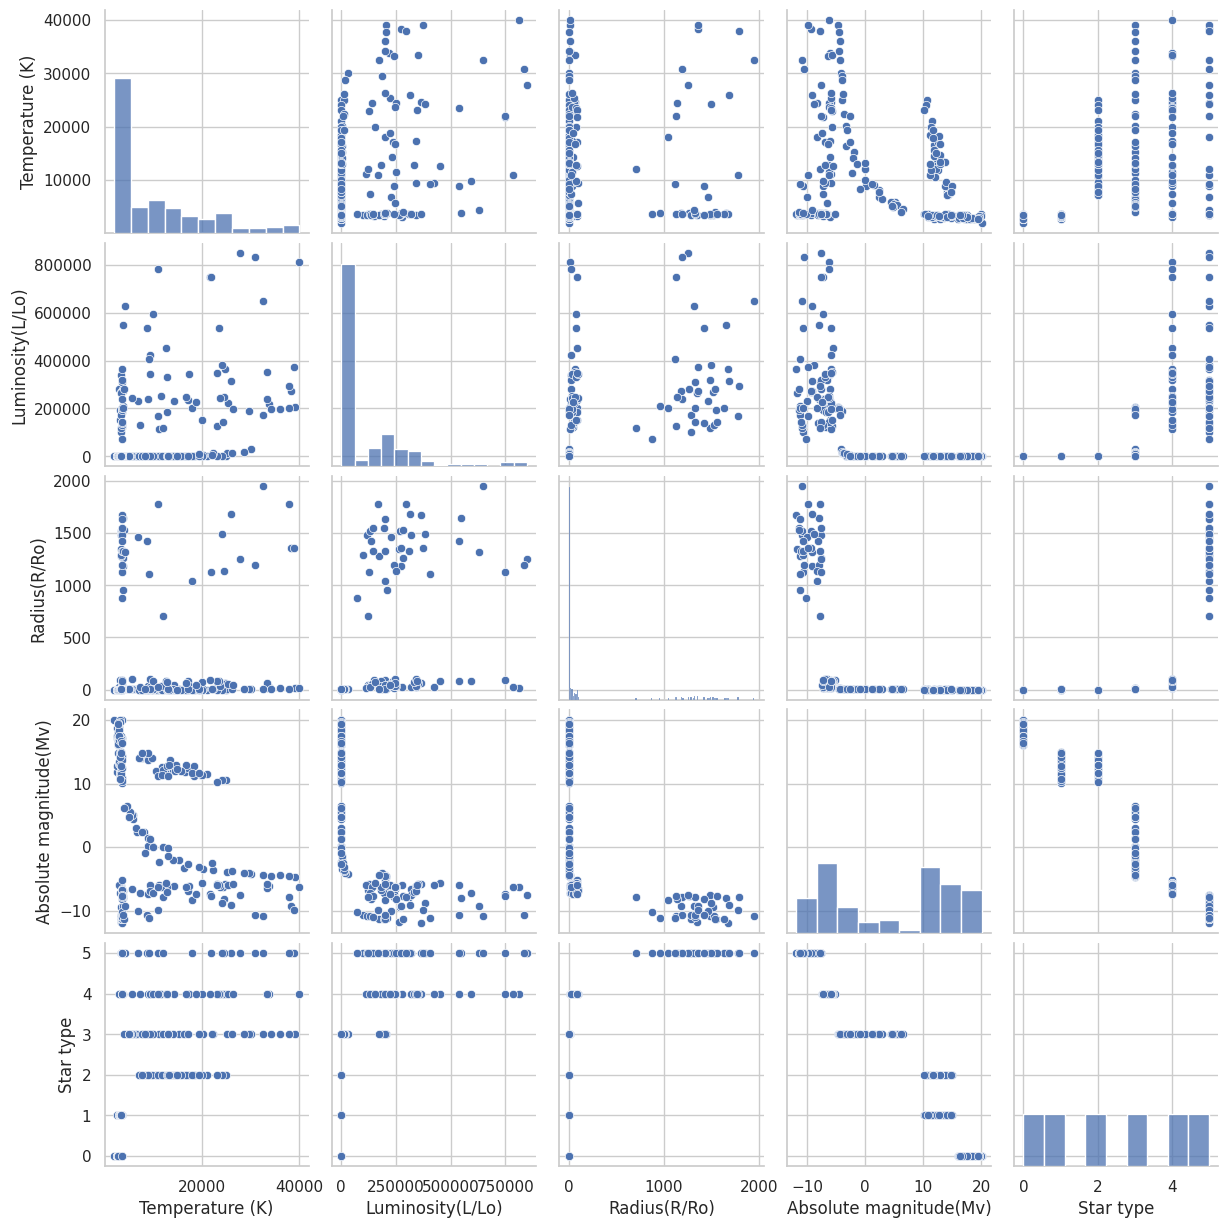

In [15]:
sns.pairplot(df)
plt.show()

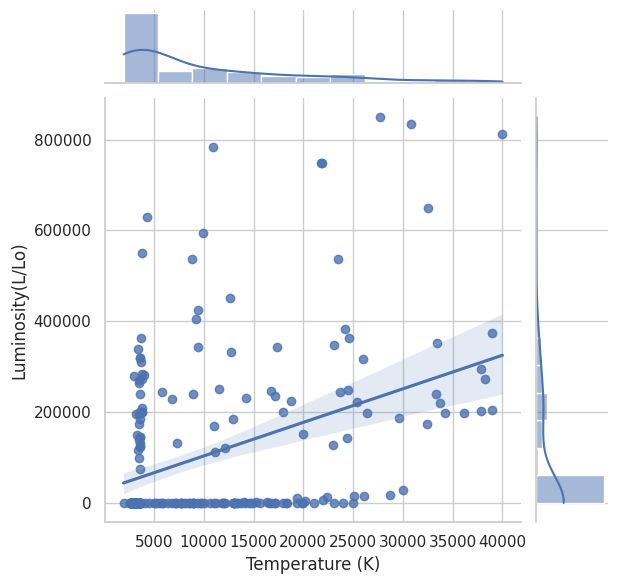

In [16]:
sns.jointplot(data=df, x='Temperature (K)', y='Luminosity(L/Lo)', kind='reg');

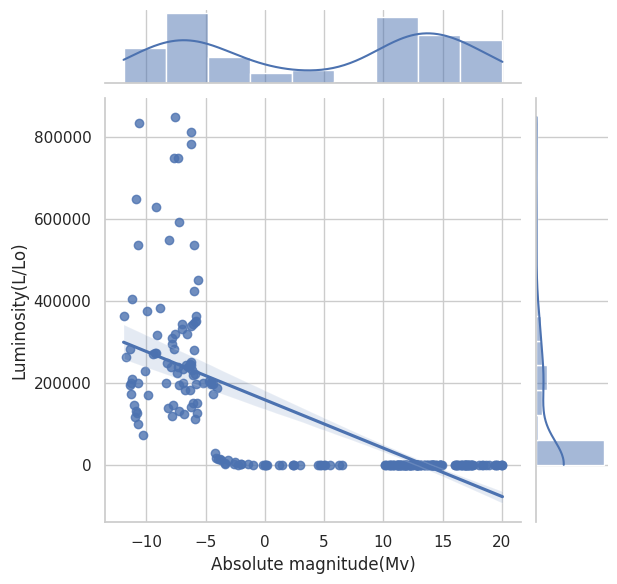

In [65]:
sns.jointplot(data=df, x='Absolute magnitude(Mv)', y='Luminosity(L/Lo)', kind='reg');


In [67]:
# Getting Feature columns
#feature = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',      'Absolute magnitude(Mv)', 'Star color', 'Star type']
#X = df[feature]

# getting prediction
#y = df['Spectral Class']

#Models.classify(df,X,y,smote = False)


In [20]:
results = {}


Logistic Regression    The LogisticRegression algorithm in scikit-learn offers two main strategies for handling multi-class classification problems: One-vs-Rest (OvR) and multinomial. By default, the multi_class parameter is set to 'ovr', which implements the One-vs-Rest strategy.

In the One-vs-Rest strategy, a separate binary classification model is trained for each class against all other classes combined. During prediction, the class with the highest confidence (or probability) from these binary classifiers is assigned as the final predicted class. This approach is straightforward and computationally efficient but can lead to imbalanced class distributions during training, especially if some classes are more prevalent than others.

On the other hand, setting multi_class='multinomial' uses the multinomial logistic regression approach. This strategy directly optimizes a single model across all classes, considering the relationships and dependencies between different classes. It can potentially offer better performance for multi-class problems by jointly modeling the probabilities of all classes.



In [24]:
# Perform one-hot encoding on categorical features ('Star color' and 'Spectral Class') to convert them into numerical representation.
df_encoded = pd.get_dummies(df, columns=['Star color', 'Spectral Class'])

# Separate the features (X) and the target variable (y) for model training.
X = df_encoded.drop(['Star type'], axis=1)
y = df_encoded['Star type']

# Split the dataset into training and testing sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables to ensure they have a mean of 0 and variance of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Propósito del escalado de variables;
Mejora la convergencia: Las funciones de optimización usadas en el entrenamiento de modelos (como descenso del gradiente) funcionan mejor cuando las variables tienen una escala similar. Esto permite al algoritmo encontrar el mínimo de la función de pérdida de manera más eficiente.
Evita sesgo hacia variables con mayor escala: Si una variable tiene valores mucho más grandes que otras, puede dominar el proceso de aprendizaje del modelo y sesgarlo hacia esa variable. El escalado asegura que todas las variables tengan una contribución similar al modelo

In [49]:
# Generate a random index to select an example
random_index = np.random.randint(0, len(X_train_scaled))

# Retrieve the random example of scaled features (X) and its corresponding target value (y)
random_X = X_train_scaled[random_index]
random_y = y_train.iloc[random_index]

# Display the random example
print("Random example of scaled features (X):")
print(random_X)
print("\nCorresponding spectral class (y):")
print(random_y)

Random example of scaled features (X):
[ 2.51262383  0.72737394 -0.38137277 -1.04333083  1.86148228 -0.07235746
 -0.19451951 -0.12598816 -0.07235746 -0.07235746 -0.34099717 -0.07235746
  0.         -0.07235746 -0.94920498 -0.1796053  -0.07235746 -0.10259784
  0.         -0.10259784 -0.12598816 -0.19451951 -0.10259784 -0.31167749
  2.081666   -0.29111125 -0.07235746 -0.12598816 -0.93933644 -0.43033148]

Corresponding spectral class (y):
4


In [51]:
method = 'Logistic Regression - ovr'

# Instantiate a Logistic Regression model with a specified random state
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target values for the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy



Accuracy (Logistic Regression - ovr): 1.0


In [52]:
method = 'Logistic Regression - multinomial'

# Create an instance of the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target values for the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy

Accuracy (Logistic Regression - multinomial): 1.0


Decision Tree¶        The DecisionTreeClassifier is a fundamental machine learning algorithm used for classification tasks. It builds a model in the form of a tree structure by recursively partitioning the data into subsets based on the feature that provides the most information gain. Each internal node represents a "decision" based on a feature, and each leaf node represents a class label.        The key advantage of decision trees is their interpretability, as the resulting model can be visualized and understood by humans. They are capable of handling both numerical and categorical data and can capture complex interactions between features.        However, decision trees are prone to overfitting, especially when they are deep and complex. This can be mitigated by techniques such as pruning or by using ensemble methods like Random Forests, which aggregate predictions from multiple decision trees. Decision trees are also sensitive to small variations in the training data, which can lead to different tree structures. Despite these limitations, decision trees are widely used due to their simplicity, interpretability, and effectiveness for a variety of classification tasks

In [53]:
method = 'Decision Tree - base'

# Create an instance of the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target values for the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy

Accuracy (Decision Tree - base): 1.0


Random Forest is an ensemble learning method based on Decision Trees. It constructs multiple decision trees during training and combines their predictions to improve accuracy and robustness. Each tree in a Random Forest is trained independently on a subset of the data and a subset of the features, making them less prone to overfitting compared to individual decision trees.

The key idea behind Random Forest is that by aggregating predictions from multiple trees (hence the term "forest"), the model can generalize better on unseen data and provide more reliable predictions. Random Forests are widely used in machine learning for classification and regression tasks due to their flexibility, scalability, and ability to handle high-dimensional datasets effectively. They are particularly suitable for tasks where traditional Decision Trees might overfit or struggle to capture complex patterns in the data

In [54]:
method = 'Decision Tree - random forest'

# Create an instance of Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy

Accuracy (Decision Tree - random forest): 1.0


Support Vector Machines (SVM) are a class of supervised learning models used for classification and regression tasks. One of the key features of SVMs is their ability to find an optimal hyperplane that maximizes the margin between classes in the feature space. This hyperplane acts as a decision boundary, effectively separating different classes of data.

In the code snippet provided, we are using the SVC class from scikit-learn to create an SVM model with a linear kernel (kernel='linear'). The linear kernel assumes a linear decision boundary between classes, making it suitable for problems where classes are linearly separable in the feature space.

SVMs are versatile and effective in handling both linear and non-linear classification tasks by leveraging different types of kernels (e.g., linear, polynomial, radial basis function). They are particularly useful when dealing with complex datasets where classes may not be easily separable using simpler models like logistic regression or decision trees

In [56]:


method = 'SVM'

# Creating an instance of Support Vector Machine (SVM) with a linear kernel
model = SVC(kernel='linear', random_state=42)

# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Making predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluating the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy



Accuracy (SVM): 0.9375


he K-Nearest Neighbors (KNN) algorithm is a simple yet effective supervised learning method used for classification and regression tasks. In KNN, the prediction of a new data point is based on the majority class of its nearest neighbors in the feature space.

In the provided code snippet, we instantiate a KNN classifier using the KNeighborsClassifier class from scikit-learn with n_neighbors=5, indicating that the algorithm will consider the 5 closest neighbors to make predictions.

KNN is a non-parametric and instance-based learning algorithm, meaning it does not make strong assumptions about the underlying distribution of the data and relies on local patterns to make predictions

In [57]:
method = 'KNN'

# Create a K-Nearest Neighbors (KNN) classifier instance with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model accuracy by comparing predicted labels with actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the KNN model
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy

Accuracy (KNN): 0.875


In [58]:


method = 'Gradient Boosting'

# Create an instance of the Gradient Boosting classifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)
# Evaluate the model accuracy by comparing predicted labels with actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the Gradient Boosting model
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy




Accuracy (Gradient Boosting): 1.0


In [59]:


method = 'Naive Bayes'

# Create an instance of the Naive Bayes (Gaussian) model
model = GaussianNB()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target values for the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy ({method}): {accuracy}")
results[method] = accuracy



Accuracy (Naive Bayes): 0.9375


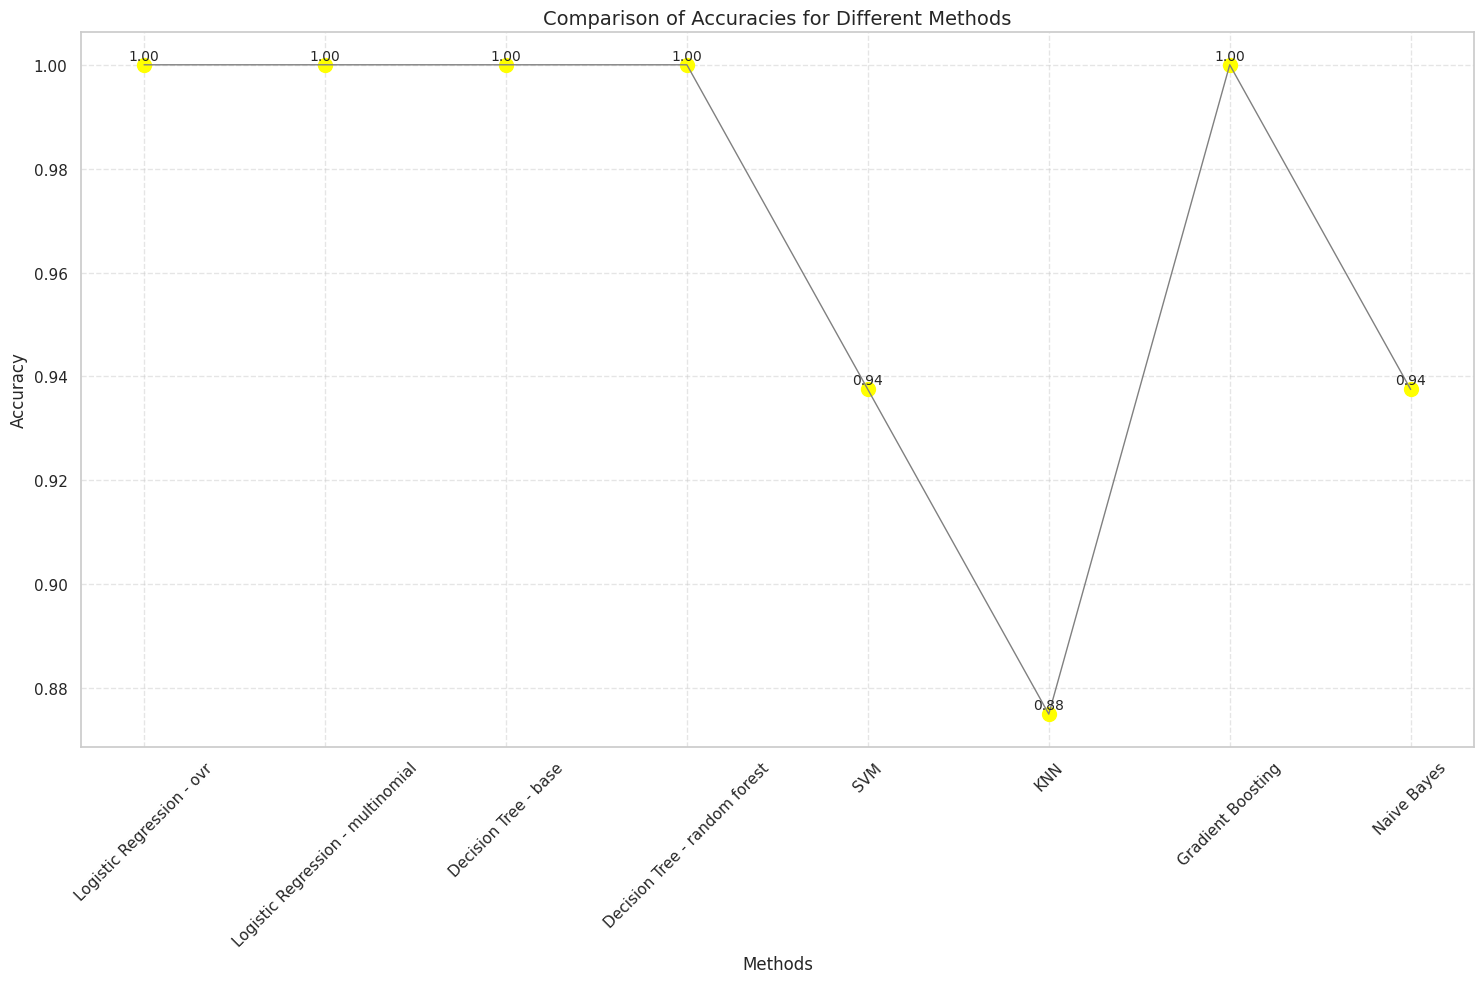

In [61]:
#conclusion


methods = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(15, 10))
plt.title('Comparison of Accuracies for Different Methods', fontsize=14)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Plot the line connecting the accuracy points (gray)
plt.plot(methods, accuracies, marker='', color='gray', linestyle='-', linewidth=1)

# Plot individual accuracy points (red)
plt.scatter(methods, accuracies, color='yellow', s=100)  # 's' adjusts the size of the scatter points

# Display gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)  # 'alpha' controls the transparency of the gridlines

# Display accuracy values next to each point
for method, accuracy in zip(methods, accuracies):
    plt.text(method, accuracy + 0.001, f'{accuracy:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

